In [5]:
import sys
sys.path.insert(1, "../")

In [6]:
import random
random.seed(42)

In [7]:

from algorithms.ga import GA
from common.problem import Problem
from benchmarks.onemax import OneMax

In [8]:
class JobSchedulingProblem:
    def __init__(self, jobs, num_machines):
        self.jobs = jobs
        self.num_machines = num_machines


    def fitness_(self,schedule):
       
        machine_times = [0] * self.num_machines
        job_times = [0] * len(self.jobs)
        for job in schedule:
            for machine, time in self.jobs[job]:
                start_time = max(machine_times[machine], job_times[job])
                machine_times[machine] = start_time + time
                job_times[job] = start_time + time
        print(schedule,max(machine_times))


        return max(machine_times)
    # Add a penalty for unassigned machines
    def fitness(self, schedule):
        assigned_machines = set(schedule)
        unassigned_machines = self.num_machines - len(assigned_machines)
    
        penalty = unassigned_machines * 1000
      
        return self.fitness_(schedule) + penalty
    

In [9]:
# Define jobs and machines
jobs = [
    [(0, 3), (1, 2), (2, 2)],  # Job 0: (Machine, Time)
    [(0, 2), (2, 1), (1, 4)],  # Job 1
    [(1, 4), (2, 1)],         # Job 2
    [(1, 4), (2, 1)]           # Job 3
]

In [36]:
jobProblem = JobSchedulingProblem(jobs, 3)


num_of_variables = 4
# define a classe de problema

num_of_individuals = 10
generations =500
variables_range = [0,3]

# Parâmetros do algoritmo
tournament_prob = 0.5
num_of_tour_particips = 2
mutation = 0.5
penalty_value = 1000
direction = "MIN"


problem = Problem(num_of_variables=num_of_variables,
                  num_of_individuals=num_of_individuals,
                  num_of_generations=generations,
                  # ATENÇÃO: aqui ele passa uma função
                  objective=[jobProblem.fitness],
                  mutation=mutation,
                  variables_range=variables_range,
                  direction=direction,
                  tournament_prob=tournament_prob,
                  num_of_tour_particips=num_of_tour_particips,
                  penalty_value=penalty_value)

[2, 1, 3, 0] 18
[0, 1, 3, 2] 21
[1, 0, 3, 2] 18
[2, 1, 0, 3] 17
[3, 1, 0, 2] 17
[2, 0, 1, 3] 18
[2, 0, 1, 3] 18
[0, 2, 3, 1] 19
[3, 1, 0, 2] 17
[3, 1, 2, 0] 18
[2, 1, 0, 3] 17
[3, 1, 0, 2] 17
[3, 1, 0, 3] 17
[3, 0, 1, 2] 18
[2, 0, 3, 2] 15
[2, 1, 0, 2] 17
[3, 1, 2, 0] 18
[2, 1, 0, 2] 17
[3, 2, 0, 1] 17
[3, 2, 0, 1] 17
[2, 1, 0, 3] 17
[3, 1, 0, 3] 17
[3, 1, 0, 2] 17
[3, 2, 0, 1] 17
[3, 2, 0, 1] 17
[2, 1, 0, 3] 17
[3, 1, 0, 3] 17
[2, 2, 0, 1] 18
[0, 1, 3, 2] 21
[0, 1, 3, 2] 21
[2, 1, 0, 3] 17
[3, 2, 1, 0] 18
[1, 2, 0, 3] 18
[3, 1, 0, 2] 17
[3, 1, 0, 2] 17
[3, 0, 2, 1] 16
[2, 1, 0, 3] 17
[2, 1, 0, 3] 17
[2, 1, 0, 3] 17
[3, 1, 2, 0] 18
[3, 1, 0, 2] 17
[1, 3, 0, 2] 18
[1, 2, 0, 3] 18
[3, 2, 0, 1] 17
[3, 1, 0, 2] 17
[3, 1, 0, 3] 17
[3, 2, 0, 1] 17
[3, 0, 2, 1] 16
[3, 0, 1, 2] 18
[2, 3, 0, 1] 17
[3, 0, 2, 1] 16
[3, 2, 0, 1] 17
[2, 1, 0, 3] 17
[3, 0, 2, 1] 16
[3, 0, 2, 1] 16
[3, 0, 2, 1] 16
[1, 0, 2, 3] 18
[3, 1, 2, 0] 18
[2, 0, 3, 1] 16
[3, 1, 2, 0] 18
[3, 0, 2, 1] 16
[3, 0, 2, 1] 16
[3, 1, 2

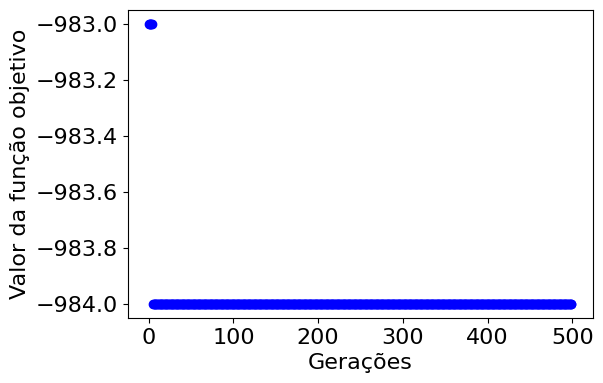

[3, 0, 2, 1] 16
-984


<Figure size 640x480 with 0 Axes>

In [37]:

from algorithms.ga_elites import GAElite
from common.individual import Individual

# Integer representation

ga = GAElite(problem=problem,
             elite_size=5)

best_solution: Individual = ga.run()

print(jobProblem.fitness(best_solution.decision_vector))
# print(jobProblem.fitness([3, 0, 2, 1]))